In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
#loading data files
tallest_men = pd.read_csv('tallest_men.csv', sep=";")
tallest_women = pd.read_csv('tallest_women.csv', sep=";")

In [363]:
# Display the first few rows to check the data
print("Tallest Men Dataset:")
print(tallest_men.head())

print("\nTallest Women Dataset:")
print(tallest_women.head())

Tallest Men Dataset:
         Country  Metric      Imperial             Name  \
0            NaN     NaN           NaN              NaN   
1  United States  272 cm  8 ft 11.1 in    Robert Wadlow   
2  United States  267 cm     8 ft 9 in       John Rogan   
3  United States  264 cm     8 ft 8 in  John F. Carroll   
4  United States  262 cm     8 ft 7 in    Willie Camper   

                                                Note        Lifespan  
0                                                NaN  (age at death)  
1         Tallest verified human in recorded history  1918–1940 (22)  
2  Second-tallest male in recorded history and ta...  1867–1905 (38)  
3  8 ft 0 in (244 cm) standing height 8 ft 8 in (...  1932–1969 (37)  
4                  Billed at 8 ft 7 in (262 cm).[12]  1924–1943 (18)  

Tallest Women Dataset:
         Country  Metric           Imperial                Name  \
0            NaN     NaN                NaN                 NaN   
1    Netherlands  260 cm  8 ft 6.75 in[1

In [365]:
# Check for missing values
print("Missing values in Tallest Men Dataset:")
print(tallest_men.isnull().sum())

print("\nMissing values in Tallest Women Dataset:")
print(tallest_women.isnull().sum())

Missing values in Tallest Men Dataset:
Country      1
Metric      15
Imperial    15
Name        15
Note        15
Lifespan    14
dtype: int64

Missing values in Tallest Women Dataset:
Country     1
Metric      2
Imperial    2
Name        2
Note        2
Lifespan    1
dtype: int64


In [367]:
# Drop rows with missing values (if necessary)
tallest_men = tallest_men.dropna()
tallest_women = tallest_women.dropna()

In [369]:
# Ensure data types are correct
print("\nData Types in Tallest Men Dataset:")
print(tallest_men.dtypes)

print("\nData Types in Tallest Women Dataset:")
print(tallest_women.dtypes)


Data Types in Tallest Men Dataset:
Country     object
Metric      object
Imperial    object
Name        object
Note        object
Lifespan    object
dtype: object

Data Types in Tallest Women Dataset:
Country     object
Metric      object
Imperial    object
Name        object
Note        object
Lifespan    object
dtype: object


In [371]:
# Add a gender column
tallest_men['gender'] = 'Male'
tallest_women['gender'] = 'Female'

In [373]:
# Combine the datasets
tallest_people = pd.concat([tallest_men, tallest_women], ignore_index=True)

In [375]:
# Display the updated DataFrame
print(tallest_people)

           Country  Metric      Imperial                 Name  \
0    United States  272 cm  8 ft 11.1 in        Robert Wadlow   
1    United States  267 cm     8 ft 9 in           John Rogan   
2    United States  264 cm     8 ft 8 in      John F. Carroll   
3    United States  262 cm     8 ft 7 in        Willie Camper   
4          Austria  258 cm   8 ft 5.6 in    Franz Winkelmeier   
..             ...     ...           ...                  ...   
169         Turkey  215 cm   7 ft 0.7 in        Rumeysa Gelgi   
170       Thailand  214 cm  7 ft 0.25 in       Malee Duangdee   
171         Latvia  213 cm     7 ft 0 in     Uljana Semjonova   
172         Sweden  210 cm    6 ft 10 in  Kristina Larsdotter   
173      Sri Lanka  208 cm    6 ft 10 in  Tharjini Sivalingam   

                                                  Note        Lifespan  gender  
0           Tallest verified human in recorded history  1918–1940 (22)    Male  
1    Second-tallest male in recorded history and ta...  1

In [377]:
# Display the first few rows of the combined dataset
print("\nCombined Dataset:")
print(tallest_people.head())


Combined Dataset:
         Country  Metric      Imperial               Name  \
0  United States  272 cm  8 ft 11.1 in      Robert Wadlow   
1  United States  267 cm     8 ft 9 in         John Rogan   
2  United States  264 cm     8 ft 8 in    John F. Carroll   
3  United States  262 cm     8 ft 7 in      Willie Camper   
4        Austria  258 cm   8 ft 5.6 in  Franz Winkelmeier   

                                                Note        Lifespan gender  
0         Tallest verified human in recorded history  1918–1940 (22)   Male  
1  Second-tallest male in recorded history and ta...  1867–1905 (38)   Male  
2  8 ft 0 in (244 cm) standing height 8 ft 8 in (...  1932–1969 (37)   Male  
3                  Billed at 8 ft 7 in (262 cm).[12]  1924–1943 (18)   Male  
4  Tallest human in European history. Measured of...  1860–1887 (27)   Male  


In [379]:
# Display the last few rows of the combined dataset
print("\nCombined Dataset:")
print(tallest_people.tail())


Combined Dataset:
       Country  Metric      Imperial                 Name  \
169     Turkey  215 cm   7 ft 0.7 in        Rumeysa Gelgi   
170   Thailand  214 cm  7 ft 0.25 in       Malee Duangdee   
171     Latvia  213 cm     7 ft 0 in     Uljana Semjonova   
172     Sweden  210 cm    6 ft 10 in  Kristina Larsdotter   
173  Sri Lanka  208 cm    6 ft 10 in  Tharjini Sivalingam   

                                                  Note        Lifespan  gender  
169  Tallest living woman officially confirmed by G...       born 1997  Female  
170     Formerly world's tallest female teenager.[165]  1991–2016 (24)  Female  
171  She was a seven-foot center and the most domin...       born 1952  Female  
172  Better known as Stor-Stina (Big Stina) she was...  1819–1854 (35)  Female  
173  She was a center and one of the most dominant ...       born 1977  Female  


In [381]:
#dropping metric column as we have height in feet
tallest_people = tallest_people.drop(columns=['Metric'])

# Function to convert imperial value
def convert_imperial(imperial_str):
    try:
        parts = imperial_str.split()
        feet = float(parts[0])  # Extracting feet part
        if len(parts) > 2:  # Check if there's an inches part
            inches = float(parts[2])
        else:
            inches = 0
        return feet + inches / 12  # Converting inches to feet
    except:
        return None  # Handle any potential errors gracefully

# Applying conversion functions to DataFrame columns
tallest_people['Imperial'] = tallest_people['Imperial'].apply(convert_imperial)

In [383]:
print(tallest_people.head())
print(tallest_people.tail())

         Country  Imperial               Name  \
0  United States  8.925000      Robert Wadlow   
1  United States  8.750000         John Rogan   
2  United States  8.666667    John F. Carroll   
3  United States  8.583333      Willie Camper   
4        Austria  8.466667  Franz Winkelmeier   

                                                Note        Lifespan gender  
0         Tallest verified human in recorded history  1918–1940 (22)   Male  
1  Second-tallest male in recorded history and ta...  1867–1905 (38)   Male  
2  8 ft 0 in (244 cm) standing height 8 ft 8 in (...  1932–1969 (37)   Male  
3                  Billed at 8 ft 7 in (262 cm).[12]  1924–1943 (18)   Male  
4  Tallest human in European history. Measured of...  1860–1887 (27)   Male  
       Country  Imperial                 Name  \
169     Turkey  7.058333        Rumeysa Gelgi   
170   Thailand  7.020833       Malee Duangdee   
171     Latvia  7.000000     Uljana Semjonova   
172     Sweden  6.833333  Kristina Larsdo

In [385]:
tallest_people.shape

(174, 6)

In [283]:
# Function to extract birth year, death year, and age
def extract_years_and_age(lifespan):
    try:
        # Check if it's 'born' case
        if lifespan.startswith('born'):
            birth_year = int(lifespan.split(' ')[1])
            death_year = None
            age = current_year - birth_year
        else:
            # Split the lifespan string by non-digit characters
            years_and_age = lifespan.split(' ')[0]  # Take the first part before any additional text
            years = years_and_age.split('–')  # Split into birth and death years if available
            birth_year = int(years[0]) if years[0].isdigit() else None
            death_year = int(years[1]) if len(years) > 1 and years[1].isdigit() else None
            
            # Extract age from parentheses
            age = None
            if '(' in lifespan and ')' in lifespan:
                age_text = lifespan.split('(')[-1].split(')')[0]  # Extract text inside parentheses
                age = int(age_text) if age_text.isdigit() else None
        
        return birth_year, death_year, age
    except:
        return None, None, None  # Handle any parsing errors gracefully

# Apply function to extract years and age, and create new columns
tallest_people[['Birth Year', 'Death Year', 'Age']] = tallest_people['Lifespan'].apply(lambda x: pd.Series(extract_years_and_age(x)))

# Display the updated DataFrame
print(tallest_people)

           Country  Imperial                 Name  \
0    United States  8.925000        Robert Wadlow   
1    United States  8.750000           John Rogan   
2    United States  8.666667      John F. Carroll   
3    United States  8.583333        Willie Camper   
4          Austria  8.466667    Franz Winkelmeier   
..             ...       ...                  ...   
169         Turkey  7.058333        Rumeysa Gelgi   
170       Thailand  7.020833       Malee Duangdee   
171         Latvia  7.000000     Uljana Semjonova   
172         Sweden  6.833333  Kristina Larsdotter   
173      Sri Lanka  6.833333  Tharjini Sivalingam   

                                                  Note        Lifespan  \
0           Tallest verified human in recorded history  1918–1940 (22)   
1    Second-tallest male in recorded history and ta...  1867–1905 (38)   
2    8 ft 0 in (244 cm) standing height 8 ft 8 in (...  1932–1969 (37)   
3                    Billed at 8 ft 7 in (262 cm).[12]  1924–1943 (

In [285]:
#dropping lifespan column as we have birth year, death year and age
tallest_people = tallest_people.drop(columns=['Lifespan'])

In [287]:
# Display the updated DataFrame
print(tallest_people)

           Country  Imperial                 Name  \
0    United States  8.925000        Robert Wadlow   
1    United States  8.750000           John Rogan   
2    United States  8.666667      John F. Carroll   
3    United States  8.583333        Willie Camper   
4          Austria  8.466667    Franz Winkelmeier   
..             ...       ...                  ...   
169         Turkey  7.058333        Rumeysa Gelgi   
170       Thailand  7.020833       Malee Duangdee   
171         Latvia  7.000000     Uljana Semjonova   
172         Sweden  6.833333  Kristina Larsdotter   
173      Sri Lanka  6.833333  Tharjini Sivalingam   

                                                  Note  gender  Birth Year  \
0           Tallest verified human in recorded history    Male      1918.0   
1    Second-tallest male in recorded history and ta...    Male      1867.0   
2    8 ft 0 in (244 cm) standing height 8 ft 8 in (...    Male      1932.0   
3                    Billed at 8 ft 7 in (262 cm).[

In [289]:
# Drop rows with missing values (if necessary)
#tallest_people = tallest_people.dropna()

In [291]:
# Display the updated DataFrame
print(tallest_people)

           Country  Imperial                 Name  \
0    United States  8.925000        Robert Wadlow   
1    United States  8.750000           John Rogan   
2    United States  8.666667      John F. Carroll   
3    United States  8.583333        Willie Camper   
4          Austria  8.466667    Franz Winkelmeier   
..             ...       ...                  ...   
169         Turkey  7.058333        Rumeysa Gelgi   
170       Thailand  7.020833       Malee Duangdee   
171         Latvia  7.000000     Uljana Semjonova   
172         Sweden  6.833333  Kristina Larsdotter   
173      Sri Lanka  6.833333  Tharjini Sivalingam   

                                                  Note  gender  Birth Year  \
0           Tallest verified human in recorded history    Male      1918.0   
1    Second-tallest male in recorded history and ta...    Male      1867.0   
2    8 ft 0 in (244 cm) standing height 8 ft 8 in (...    Male      1932.0   
3                    Billed at 8 ft 7 in (262 cm).[

C:\Users\13527\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


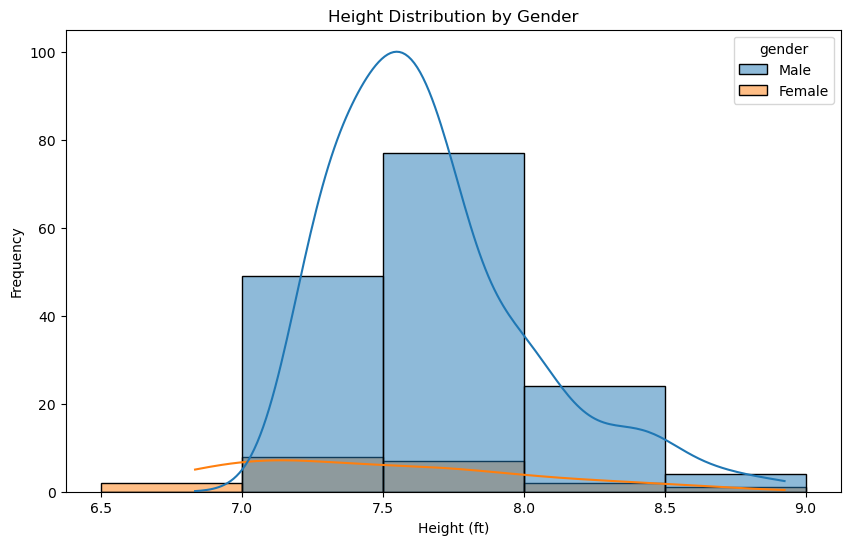

In [357]:
# Define custom bins
custom_bins = [6.5, 7, 7.5, 8, 8.5, 9]

# Define colors for genders
#gender_colors = {'Male': 'yellow', 'Female': 'brown'}

plt.figure(figsize=(10, 6))
sns.histplot(data=tallest_people, x='Imperial', hue='gender', bins=custom_bins, kde= True)
plt.title('Height Distribution by Gender')
plt.xlabel('Height (ft)')
plt.ylabel('Frequency')
plt.show()

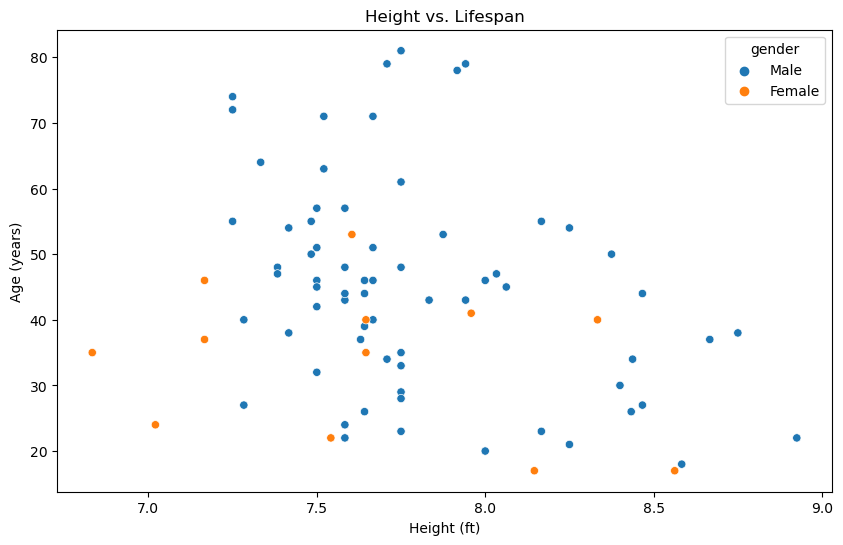

In [299]:
# Drop rows with NaN values in 'length' or 'lifespan' columns
tallest_people_cleaned = tallest_people.dropna(subset=['Imperial', 'Age'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tallest_people_cleaned, x='Imperial', y='Age', hue='gender')
plt.title('Height vs. Lifespan')
plt.xlabel('Height (ft)')
plt.ylabel('Age (years)')
plt.show()

In [301]:
print(tallest_people_cleaned['Age'].sort_values(ascending=False))

44     81.0
56     79.0
29     79.0
32     78.0
138    74.0
       ... 
12     21.0
21     20.0
3      18.0
156    17.0
154    17.0
Name: Age, Length: 80, dtype: float64


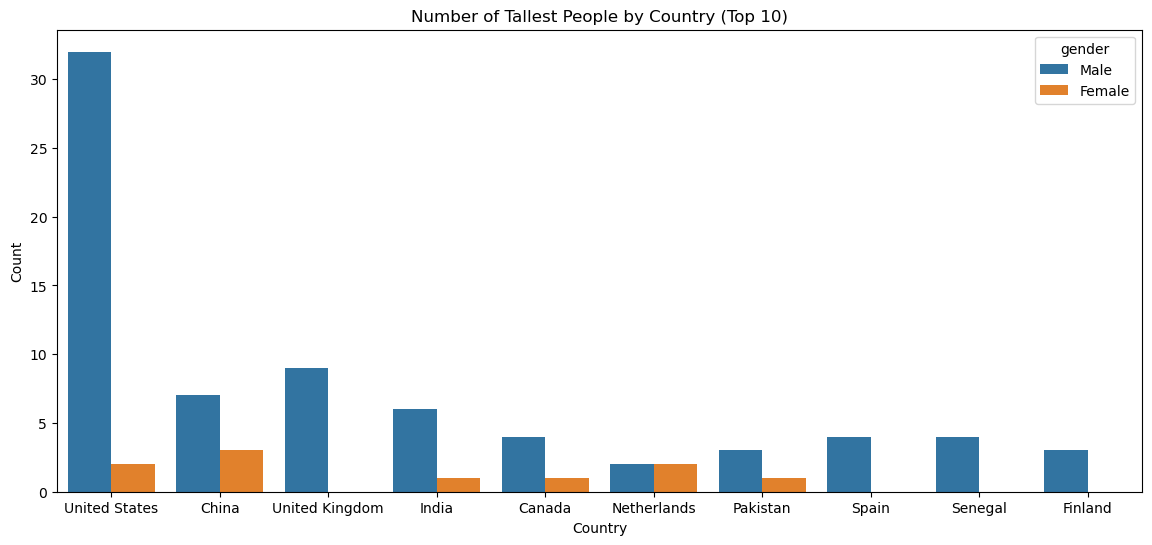

In [329]:
# Get top 10 countries by count
top_10_countries = tallest_people['Country'].value_counts().head(10).index

plt.figure(figsize=(14, 6))
sns.countplot(data=tallest_people, x='Country', hue='gender', order=top_10_countries)
plt.title('Number of Tallest People by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels horizontally
plt.show()